In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 50
batch_size = 64
folder_name = 'AXO_handwritten'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  sensor_size_to = 64,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(128, 128)), Downsample(time_factor=1, spatial_factor=0.5, sensor_size=None, target_size=None), ToFrame(sensor_size=(64, 64, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 50
dataset_dict

{'num_input': 8192,
 'num_input_channels': 2,
 'num_training_samples': 6000,
 'num_output': 3,
 'dataset_name': 'davis',
 'time_ms': 50}

Delta t: 1.0 ms
SNN(
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 8, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): FlattenSNNLayer()
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=96, bias=False)
    )
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=3, bias=False)
    )
  )
  (criterion): MSELoss()
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [31/93], Loss: 0.22815
Step [62/93], Loss: 0.19317
Step [93/93], Loss: 0.16736
Time elasped: 101.27291131019592
3000
Test Loss: 0.2056847312983046
Avg spk_count per neuron for all 50 time-steps 1357.5338888888887
Test Accuracy of the model on the test samples: 57.167

saving max acc: 57.166666666666664
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_conv2
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.15166
Step [62/93], Loss: 0.12293
Step [93/93], Loss: 0.10779
Time elasped: 25.94466757774353
3000
Test Loss: 0.1445269743178753
Avg spk_count per neuron for all 50 time-steps 2165.4669999999996
Test Accuracy of the model on the test samples: 73.700

saving max acc: 73.7
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_conv2
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.06537
Step [62/93], Loss: 0.08537
Step [93/93], Loss: 0.06671
Time elasped: 37.

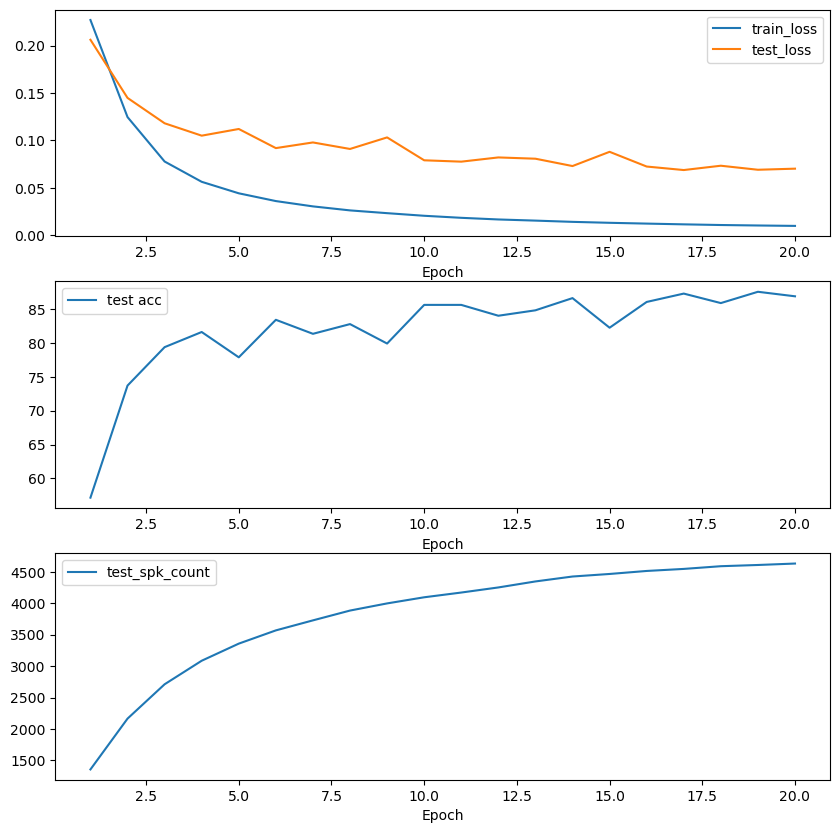

In [3]:
ckpt_dir = 'axo_conv2'

tau_m = 5.0 

model_config = [
    {
        'type': 'Conv2D', 
        'out_channels': 8, 
        'kernel_size': 4 
    }, 
    {
        'type': 'Flatten'
    }, 
    {
        'type': 'Feedforward', 
        'num_out': 96 # Number of neurons in this dense layer
    }
]

snn = SNN(dataset_dict=dataset_dict, model_config=model_config,
           tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
        )

#snn.input2spike_th = 0.5

snn.model_name = 'axo_conv'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

another 10 epochs

Epoch [1/20], learning_rates 0.001000, 0.100000
Step [31/93], Loss: 0.01249
Step [62/93], Loss: 0.01227
Step [93/93], Loss: 0.01517
Time elasped: 31.432143926620483
3000
Test Loss: 0.06283673659918156
Avg spk_count per neuron for all 50 time-steps 4677.397444444444
Test Accuracy of the model on the test samples: 88.767

saving max acc: 88.76666666666667
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\axo_conv2
Epoch [2/20], learning_rates 0.000902, 0.090250
Step [31/93], Loss: 0.00792
Step [62/93], Loss: 0.00793
Step [93/93], Loss: 0.00826
Time elasped: 39.89830422401428
3000
Test Loss: 0.06886438977845172
Avg spk_count per neuron for all 50 time-steps 4738.650333333332
Test Accuracy of the model on the test samples: 86.767

Epoch [3/20], learning_rates 0.000902, 0.090250
Step [31/93], Loss: 0.00621
Step [62/93], Loss: 0.00670
Step [93/93], Loss: 0.01073
Time elasped: 35.21413016319275
3000
Test Loss: 0.06453859187821125
Avg spk_count per neuro

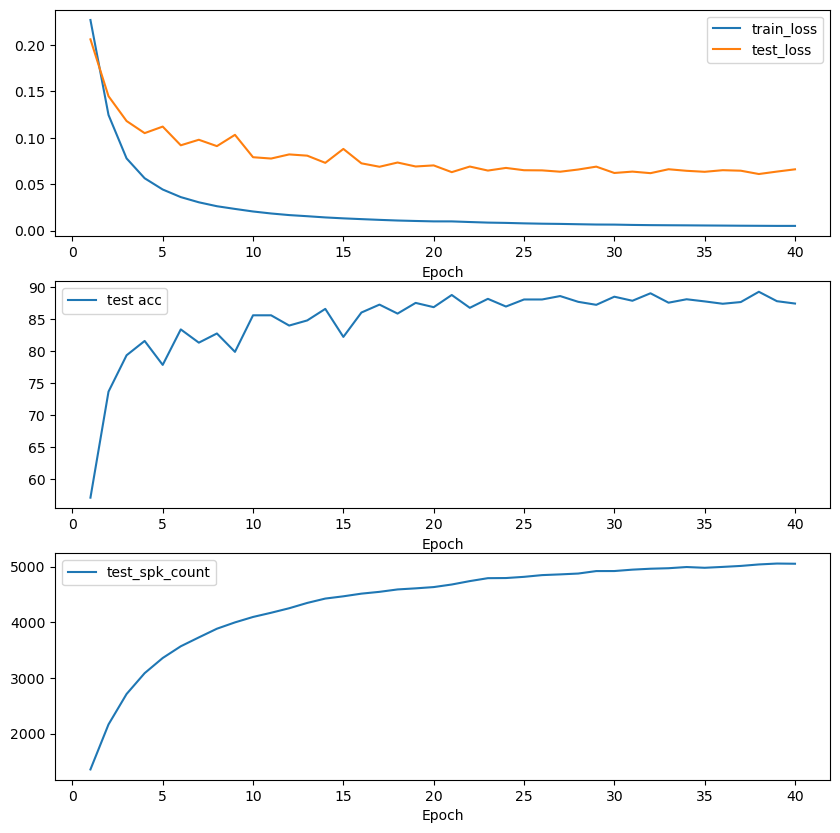

In [4]:
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)